In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from mtt.visualize import plot_mtt

rng = np.random.default_rng()

In [20]:
from mtt.simulator import Simulator
from mtt.data import OnlineDataset

init_simulator = lambda: Simulator(
    window=1000,
    width=2000,
    n_targets=10,
    target_lifetime=5,
    clutter_rate=10,
    p_detection=0.95,
    sigma_motion=0.5,
    sigma_initial_state=(10.0, 5.0),
    n_sensors=3,
    sensor_range=500,
    noise_range=10.0,
    noise_bearing=0.1,
    dt=1.0,
)
dataset = OnlineDataset(n_steps=1, sigma_position=10, length=20, img_size=128, init_simulator=init_simulator)
dataset = list(dataset)

In [21]:
positions = [info[-1]["target_positions"] for *_, info in dataset]
n_targets = np.zeros(len(positions))
for i, pos in enumerate(positions):
    n_targets[i] = (np.abs(pos) < 500).all(axis=1).sum(axis=0)
print(f"# of targets: mean = {np.mean(n_targets):0.2f}, std = {np.std(n_targets):0.2f}")
print(f"position std: {np.std(np.concatenate(positions), axis=0)}")

# of targets: mean = 7.00, std = 0.00
position std: [526.09290116 626.07050169]


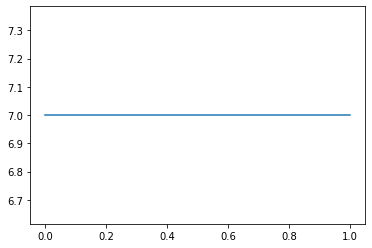

In [22]:
plt.plot(n_targets)

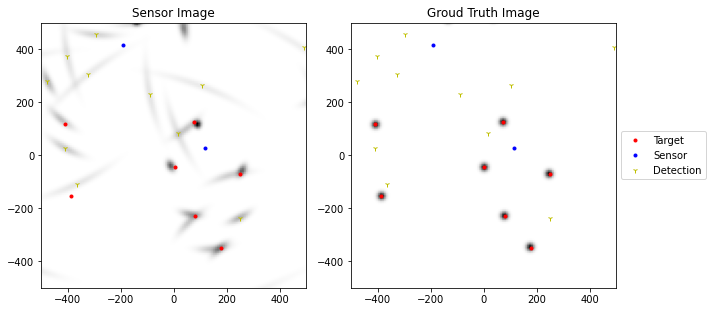

In [23]:
plot_mtt(*dataset[0])
plt.show()